In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
atletas = pd.read_csv('https://raw.githubusercontent.com/carsimoes/pre-processing-olympics/main/athlete_events.csv')

In [3]:
noc = pd.read_csv('https://raw.githubusercontent.com/carsimoes/pre-processing-olympics/main/noc_regions.csv')

Conhecendo a estrutura dos dataframes

In [4]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
noc.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Verificando missing data

In [6]:
atletas.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
atletas.isnull().sum()

ID           0
Name         0
Sex          0
Age        268
Height    1039
Weight    1048
Team         0
NOC          0
Games        0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal     4478
dtype: int64

** Não tem idade, peso, altura e medalha em vários atletas

Visualizar será melhor?

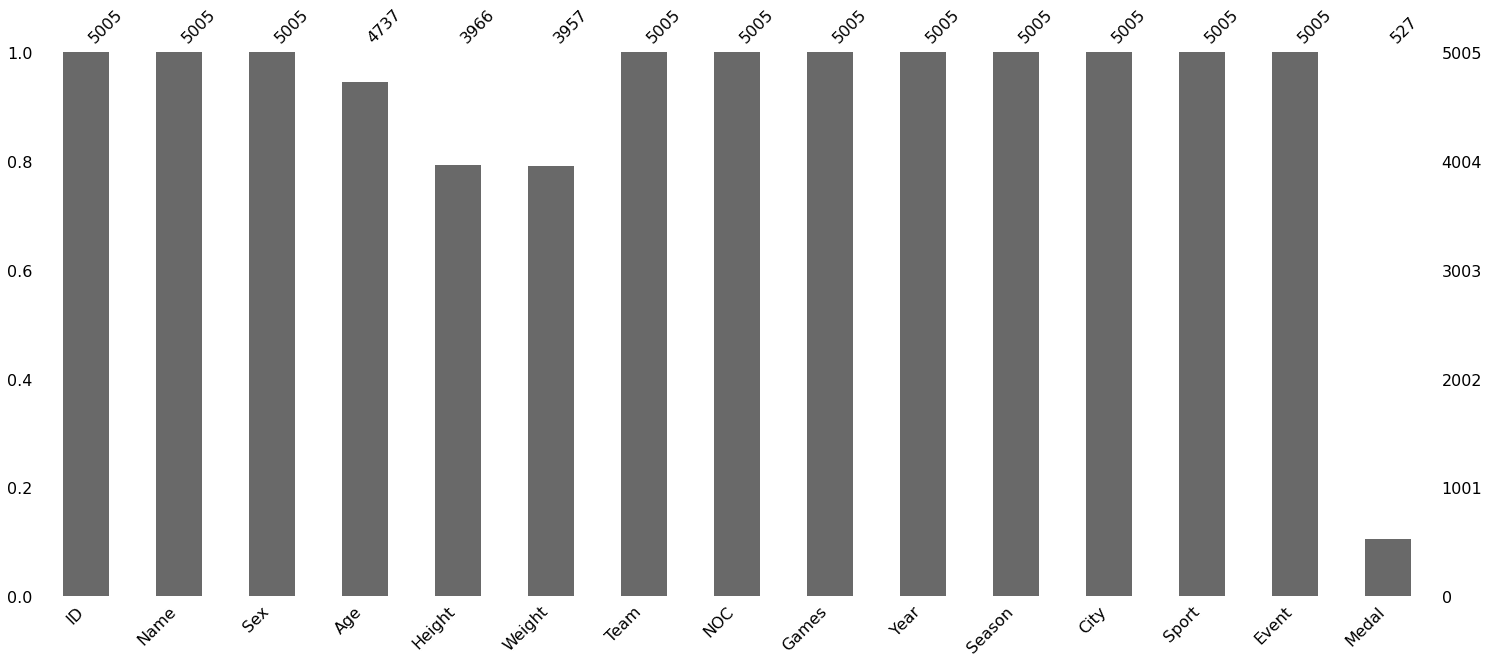

In [8]:
import missingno as msno  #boa prática, coloque sempre no início de seu código. Para ver a completude dos dados dos atletas.

msno.bar(atletas)

Faz sentido imputar dados de medalhas???

In [9]:
noc.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

# Estatísticas descritivas básicas

In [10]:
atletas.describe()

,ID,Age,Height,Weight,Year
count,5005.000000,4737.000000,3966.000000,3957.000000,5005.000000
mean,1415.128072,25.227148,175.286435,71.115744,1983.422577
std,830.256858,6.046477,10.260179,14.368278,26.992521
min,1.000000,14.000000,132.000000,38.000000,1896.000000
25%,704.000000,21.000000,169.000000,62.000000,1968.000000
50%,1408.000000,24.000000,175.000000,70.000000,1992.000000
75%,2157.000000,28.000000,182.000000,80.000000,2004.000000
max,2854.000000,71.000000,213.000000,163.000000,2016.000000


Verificando valores plausíveis ....faz sentido ter alguém com idade = 14 anos?

In [11]:
atletas[atletas['Age']==14]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
517,290,Fatima Abdul Majeed Hameed Al-Kirashi,F,14.0,NaN,NaN,Bahrain,BRN,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 50 metres Freestyle,NaN
1109,621,Anas Sameer N. H. Abuyousuf,M,14.0,181.0,77.0,Qatar,QAT,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Freestyle,NaN
1421,799,Nafissatou Moussa Adamou,F,14.0,172.0,72.0,Niger,NIG,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN
2613,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN
2981,1661,Doli Akhtar,F,14.0,158.0,53.0,Bangladesh,BAN,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Women's 100 metres Breaststroke,NaN
3275,1842,Sameera Zayid Al-Bitar,F,14.0,168.0,64.0,Bahrain,BRN,2004 Summer,2004,Summer,Athina,Swimming,Swimming Women's 50 metres Freestyle,NaN
3525,2012,Khalid Al-Kulaibi,M,14.0,170.0,63.0,Oman,OMA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 50 metres Freestyle,NaN
3787,2181,Majed Al-Taqi,M,14.0,165.0,65.0,Kuwait,KUW,1984 Summer,1984,Summer,Los Angeles,Diving,Diving Men's Springboard,NaN
4876,2784,Fatim Alkrmova,F,14.0,175.0,60.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN


In [12]:
noc.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [13]:
noc[noc['region'] == 'Brazil']

,NOC,region,notes
29,BRA,Brazil,NaN


In [14]:
atletas[atletas['NOC']=='BRA']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
665,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
666,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
668,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
781,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
1005,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4806,2750,Aline Pellegrino,F,30.0,180.0,71.0,Brazil,BRA,2012 Summer,2012,Summer,London,Football,Football Women's Football,NaN
4807,2751,Aline Silva dos Santos,F,22.0,195.0,96.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Handball,Handball Women's Handball,NaN
4808,2751,Aline Silva dos Santos,F,26.0,195.0,96.0,Brazil,BRA,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,NaN
4824,2758,Alison Conte Cerutti,M,26.0,203.0,106.0,Brazil-1,BRA,2012 Summer,2012,Summer,London,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Silver


In [15]:
atletas[atletas['Year'] == 2016]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,2784,Fatim Alkrmova,F,14.0,175.0,60.0,Azerbaijan,AZE,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Freestyle,NaN
4922,2801,Claire Allan,F,31.0,170.0,65.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,NaN
4925,2803,Florence Allan,F,18.0,168.0,57.0,Cayman Islands,CAY,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's One Person Dinghy,NaN
4958,2827,Heba Allejji,F,19.0,NaN,NaN,Syria,SYR,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Singles,NaN


Resumindo as olimpíadas de 2016 no Rio de Janeiro

In [17]:
rio2016 = atletas[atletas['Year']==2016]

In [19]:
rio2016['Medal'].value_counts()

Bronze    21
Silver    12
Gold      12
Name: Medal, dtype: int64

In [18]:
rio2016.groupby(['NOC'])[['Medal']].count()

,Medal
NOC,
ALG,0
ANG,0
ARG,0
ARM,1
AUS,1
...,...
UKR,0
USA,9
UZB,1


In [20]:
### verificando o top 20
rio2016.groupby(['NOC'])[['Medal']].count().sort_values(by='Medal', ascending=False)[0:20]

,Medal
NOC,
USA,9
RUS,4
ITA,3
RSA,2
NGR,2
FRA,2
ESP,2
INA,2
IOA,2


In [21]:
### verificando a distribuicao de medalhas por esporte
rio2016[rio2016['Medal'].notnull()].groupby(['NOC', 'Sport', 'Medal'])[['Event']].nunique()

Event
NOC Sport               Medal        
ARM Wrestling           Gold        1
AUS Swimming            Bronze      1
AZE Taekwondo           Bronze      1
BRA Beach Volleyball    Gold        1
CAN Athletics           Bronze      1
ESP Basketball          Bronze      1
    Rhythmic Gymnastics Silver      1
FRA Handball            Silver      1
    Judo                Silver      1
GBR Boxing              Gold        1
GER Equestrianism       Bronze      1
INA Badminton           Gold        1
    Weightlifting       Silver      1
IOA Shooting            Bronze      1
                        Gold        1
IRI Taekwondo           Bronze      1
    Wrestling           Bronze      1
ITA Rowing              Bronze      1
    Water Polo          Bronze      1
                        Silver      1
JOR Taekwondo           Gold        1
NED Rowing              Silver      1
NGR Football            Bronze      1
NIG Taekwondo           Silver      1
NZL Athletics           Silver      1
    Sailing             Silver      1
RSA Rugby Sevens        Bronze      1
RUS Fencing             Gold        1
    Gymnastics          Bronze      1
                        Silver      2
SRB Water Polo          Gold        1
TUR Wrestling           Gold        1
USA Athletics           Gold        1
                        Silver      1
    Fencing             Bronze      1
    Swimming            Bronze      2
                        Gold        2
    Volleyball          Bronze      1
UZB Boxing              Bronze      1

In [22]:
rio2016[(rio2016['NOC'] == 'BRA')].groupby(['NOC', 'Sport', 'Medal'])[['Event']].nunique()

,,,Event
NOC,Sport,Medal,
BRA,Beach Volleyball,Gold,1


In [23]:
rio2016[(rio2016['NOC'] == 'BRA') & (rio2016['Medal'] == 'Gold')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4825,2758,Alison Conte Cerutti,M,30.0,203.0,106.0,Brazil-1,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Beach Volleyball,Beach Volleyball Men's Beach Volleyball,Gold


In [28]:
medalhas = atletas.groupby(['NOC', 'Event', 'Medal']).nunique().index

# Pivot

In [29]:
##É possível verificar que país ganhou cada medalha por evento?

medalhas = medalhas.to_frame()

In [30]:
medalhas = medalhas.reset_index(drop=True)

In [31]:
medalhas.pivot_table(values='NOC', index='Event', columns='Medal', aggfunc='first')

Medal,Bronze,Gold,Silver
Event,,,
Alpine Skiing Men's Combined,FRA,NOR,NOR
Alpine Skiing Men's Downhill,NaN,NaN,NOR
Alpine Skiing Men's Giant Slalom,NOR,NaN,NaN
Alpine Skiing Men's Super G,NOR,NOR,NaN
"Archery Men's Target Archery, 28 metres, Team",NaN,NaN,BEL
...,...,...,...
"Wrestling Men's Lightweight, Greco-Roman",NaN,RUS,NaN
"Wrestling Men's Middleweight B, Greco-Roman",NaN,NaN,SWE
"Wrestling Men's Middleweight, Freestyle",NaN,BUL,NaN


## Vamos investigar os vencedores (medalhas de ouro)

In [33]:
gold = atletas[atletas['Medal'] == 'Gold'].copy()

In [34]:
gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,2785,Alphonse Allaert,M,44.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 33 metres, Team",Gold
4879,2785,Alphonse Allaert,M,44.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 50 metres, Team",Gold
4965,2832,"William Charles ""Bill"" Allen",M,24.0,188.0,95.0,United States,USA,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,Gold
4994,2849,"Katherine Jessie Jean ""Kate"" Allen (-Diechtler)",F,34.0,163.0,53.0,Austria,AUT,2004 Summer,2004,Summer,Athina,Triathlon,Triathlon Women's Olympic Distance,Gold


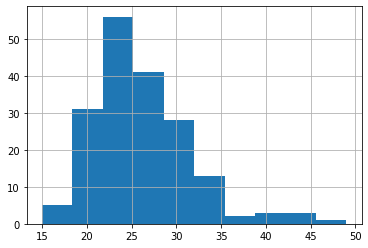

In [35]:
gold['Age'].hist()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


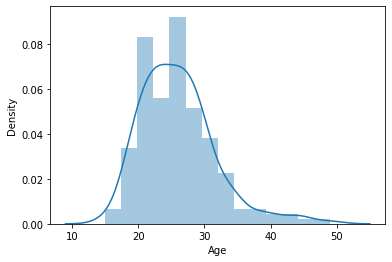

In [36]:
sns.distplot(gold['Age'], hist=True)

# E se fosse preciso padronizar os dados? Qual o efeito?

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
std_age = sc.fit_transform(gold[['Age']])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


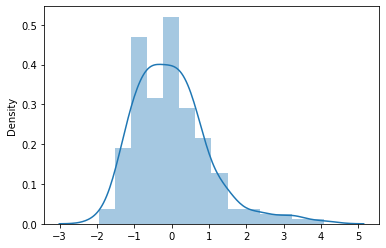

In [41]:
sns.distplot(std_age, hist=True)

# Ruídos / Discretização

In [42]:
gold['Age'].describe()

count    183.000000
mean      25.983607
std        5.655373
min       15.000000
25%       22.000000
50%       25.000000
75%       29.000000
max       49.000000
Name: Age, dtype: float64

Caso julgassemos que há um ruído na coleta da variável Age, poderíamos aplicar uma técnica simples, a qual consiste em dividir os valores deste atributo em faixas, de modo que cada faixa contenha aproximadamente a mesma quantidade de valores. Em seguida, os valores contidos em cada faixa são substituídos por uma medida que os sumarize, como a média.

In [44]:
bins = pd.qcut(gold['Age'], 10)

In [45]:
bins.value_counts()

(14.999, 20.0]    30
(25.0, 27.0]      29
(20.0, 22.0]      25
(22.6, 24.0]      25
(28.0, 30.0]      24
(33.0, 49.0]      17
(24.0, 25.0]      12
(27.0, 28.0]      12
(30.0, 33.0]       9
(22.0, 22.6]       0
Name: Age, dtype: int64

In [46]:
grupos = gold['Age'].groupby(bins)

In [47]:
medias = grupos.mean()

In [48]:
medias

Age
(14.999, 20.0]    19.033333
(20.0, 22.0]      21.760000
(22.0, 22.6]            NaN
(22.6, 24.0]      23.400000
(24.0, 25.0]      25.000000
(25.0, 27.0]      26.517241
(27.0, 28.0]      28.000000
(28.0, 30.0]      29.541667
(30.0, 33.0]      32.000000
(33.0, 49.0]      38.411765
Name: Age, dtype: float64

In [49]:
nova_age = bins.apply(lambda x : medias[x])

In [50]:
gold.loc[:,'Age_bin'] = nova_age

In [51]:
gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Age_bin
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,38.411765
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,28.000000
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,28.000000
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,28.000000
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,19.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,2785,Alphonse Allaert,M,44.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 33 metres, Team",Gold,38.411765
4879,2785,Alphonse Allaert,M,44.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Archery,"Archery Men's Target Archery, 50 metres, Team",Gold,38.411765
4965,2832,"William Charles ""Bill"" Allen",M,24.0,188.0,95.0,United States,USA,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,Gold,23.400000
4994,2849,"Katherine Jessie Jean ""Kate"" Allen (-Diechtler)",F,34.0,163.0,53.0,Austria,AUT,2004 Summer,2004,Summer,Athina,Triathlon,Triathlon Women's Olympic Distance,Gold,38.411765


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


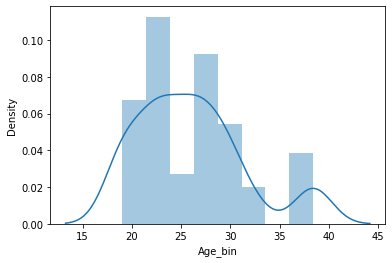

In [52]:
sns.distplot(gold['Age_bin'], hist=True)

In [53]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [54]:
alt.Chart(gold).mark_bar().encode(
    x = 'Age',
    y = 'count()',
    tooltip = ['Age', 'Sex', 'count()'],
    color = alt.Color('Sex'),
    order=alt.Order(
     'Sex',
      sort='ascending'
    )
)

alt.Chart(...)

# jogos para maiores de 50 anos?

In [55]:
gold[gold.Age > 50].shape

(0, 16)

In [56]:
gold_50 = gold[gold.Age > 50]

In [57]:
gold_50['Sport'].value_counts()

Series([], Name: Sport, dtype: int64)

In [58]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(gold_50['Sport'])
plt.title('Gold Medals for Athletes Over 50');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: ignored

<Figure size 1440x720 with 0 Axes>